# K-means can go wrong!

### You might know that k-means performances are significantly conditioned by its initialization. Provide an example that shows that with wrong initialization, the cost of the solution produced by the k-means algorithm can be arbitrarily larger from the cost of the optimal solution. You can either code it, or explain it in a clear text file.

The __K-means algorithm__ is one of the most popular clustering algorithms however its operation is heavily influenced by the initialization, therefore a correct initialization can reduce the computational cost of the algorithm


So to see if a better initialization works, we use k-means++ to choose the initial values (or seeds) for the k-means clustering algorithm.


In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### We need a big DataFrame, we can use the dataframe used during the 28/11 lab with information about Chicago crimes

In [2]:
# Import the dataset 
df = pd.read_csv("../Crime2001.csv")

/home/giulio/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#we need only the latitude and the longitude to verify our hypothesis
col_n = ['Longitude', 'Latitude']
df = pd.DataFrame(df,columns=col_n)
#We drop the null values 
#and those smaller than 91 to avoid errors (same thing used during the lesson of the laboratory)
df = df.dropna(0)
df.drop( df[ df['Longitude'] < -91].index , inplace=True)

### In this case used the random init

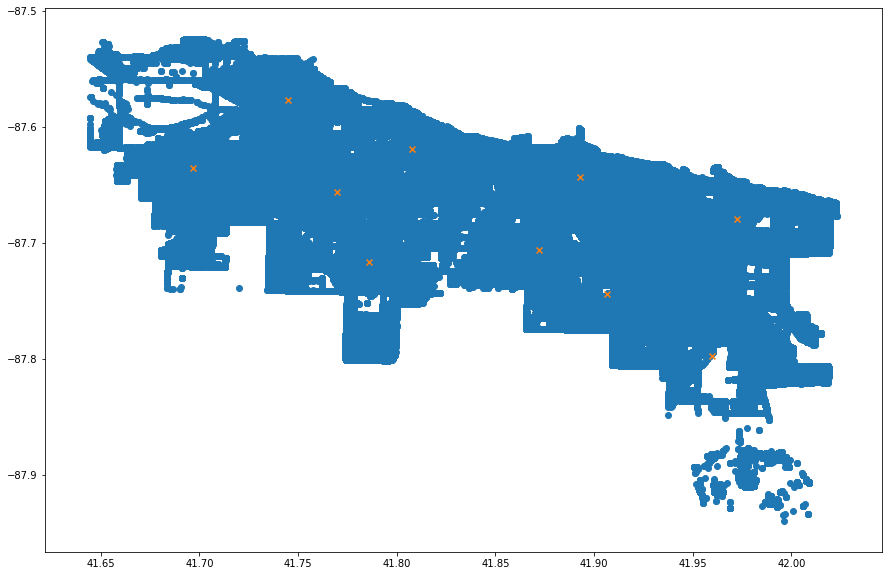

Rand time:  492.81009817123413


In [11]:
start = time.time()

# Create our k-mean model with random init
model = KMeans(n_clusters = 10, init = 'random')

# Fit our data in the model
model.fit(df[['Latitude', 'Longitude']])

centroids = model.cluster_centers_

fig = plt.figure(figsize = (15,10))
plt.scatter(df['Latitude'],df['Longitude'])
plt.scatter(centroids[:,0], centroids[:,1], marker='x')

plt.show()

time_rand = time.time() - start
print('Rand time: ', time_rand)


## Now i used the k-means++

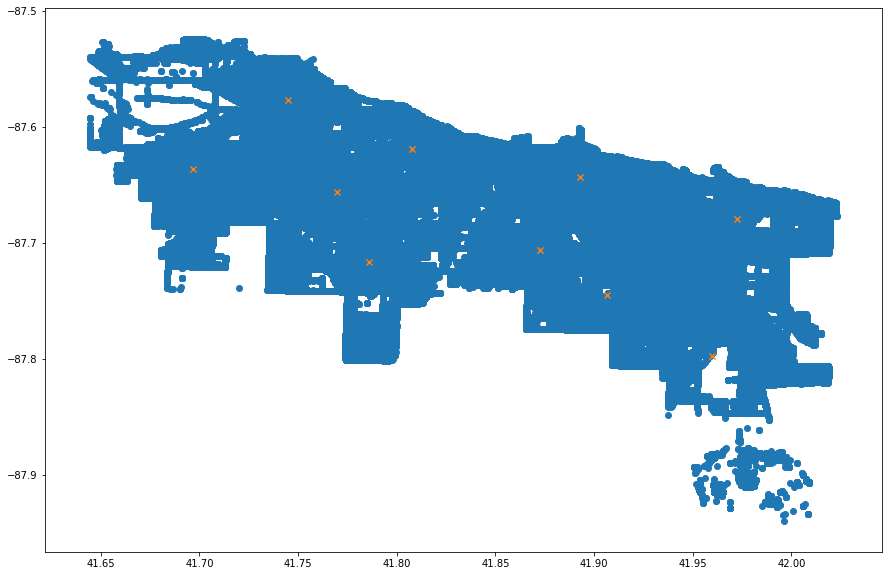

K-means++ time:  414.5784649848938


In [5]:
start = time.time()

# Create our k-mean model with k-means++ init
model1 = KMeans(n_clusters = 10, init = 'k-means++')

# Fit our data in the model
model1.fit(df[['Latitude', 'Longitude']])

centroids1 = model.cluster_centers_

fig1 = plt.figure(figsize = (15,10))
plt.scatter(df['Latitude'],df['Longitude'])
plt.scatter(centroids1[:,0], centroids1[:,1], marker='x')
plt.show()

time_k = time.time() - start
print('K-means++ time: ', time_k)

## Conclusion

In [12]:
print(100*(1-time_k/time_rand), " %")

15.874600272325912  %
